In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Placement Project/Ref. material/Company_x.xlsx')

In [4]:
df.head(10)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,932,Creditor 1,3677,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,53.0,0,0,1,N,NaN,NaN,NaN
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,...,NaN,1.0,NaN,0,0,1,Y,NaN,NaN,NaN
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,NaN,1,0,1,N,NaN,NaN,NaN
3,160,Creditor 2,9859,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,NaN,...,NaN,1.0,NaN,1,0,1,Y,NaN,NaN,NaN
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,46.0,2,0,1,Y,NaN,NaN,NaN
5,932,Creditor 1,13465,1118.74,790.30,790.30,4.22,Other,PASSIVE,NaN,...,Cheque,1.0,NaN,0,0,1,Y,NaN,NaN,NaN
6,932,Creditor 1,18664,0.00,71.89,71.89,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,50.0,2,0,1,N,NaN,NaN,NaN
7,160,Creditor 2,18816,0.00,11091.35,11091.35,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,NaN,1,0,1,N,NaN,NaN,NaN
8,932,Creditor 1,21091,481.34,404.67,404.67,4.22,Other,CLOSED,Insolvent,...,Cheque,1.0,NaN,1,0,0,Y,NaN,NaN,NaN
9,932,Creditor 1,24413,0.00,903.76,903.76,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,46.0,1,0,1,N,NaN,NaN,NaN


In [5]:
# Checking the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   Balanaceatdebt_load         406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   ClosureReason               9030 non-null    object 
 10  InBankruptcy                406423 non-null  object 
 11  AccountInsolvencyType       285 non-null     object 
 12  CustomerInsolvencyType      8531 non-null    object 
 13  IsLegal       

## Dropping unwanted columns

In [6]:
df.drop(['EntityID', 'AccountID', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  object 
 1   CurrentBalance              406423 non-null  float64
 2   DebtLoadPrincipal           406423 non-null  float64
 3   Balanaceatdebt_load         406423 non-null  float64
 4   PurchasePrice               403731 non-null  float64
 5   ProductOrDebtType           406423 non-null  object 
 6   CollectionStatus            406423 non-null  object 
 7   ClosureReason               9030 non-null    object 
 8   InBankruptcy                406423 non-null  object 
 9   AccountInsolvencyType       285 non-null     object 
 10  CustomerInsolvencyType      8531 non-null    object 
 11  IsLegal                     406423 non-null  object 
 12  LastPaymentAmount           103977 non-null  float64
 13  LastPaymentMet

## Description for Numerical features

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CurrentBalance,406423.0,1301.866266,4030.513710,-7717.20,85.330,457.51,1159.365,441681.52
DebtLoadPrincipal,406423.0,1539.010928,4416.229311,0.00,246.970,619.00,1393.780,844343.00
Balanaceatdebt_load,406423.0,1600.933847,4531.889319,0.00,249.875,630.74,1433.755,844343.00
PurchasePrice,403731.0,5.618606,5.441934,0.19,3.070,4.22,6.590,52.18
LastPaymentAmount,103977.0,283.896947,1119.842219,0.01,20.000,40.00,142.900,73131.84
NumLiableParties,406301.0,1.017145,0.132866,1.00,1.000,1.00,1.000,4.00
CustomerAge,376941.0,45.728061,12.950395,-41.00,36.000,44.00,54.000,133.00
NumPhones,406423.0,0.435652,0.714852,0.00,0.000,0.00,1.000,8.00
NumEmails,406423.0,0.208113,0.434321,0.00,0.000,0.00,0.000,5.00
NumAddresses,406423.0,0.847354,0.459690,0.00,1.000,1.00,1.000,7.00


## Description for Categorical features

In [9]:
df.describe(include=object).T

,count,unique,top,freq
OriginalCreditor[Redacted],406423,52,Creditor 17,84768
ProductOrDebtType,406423,10,Utilities/Telco - Other,212158
CollectionStatus,406423,12,ACTIVE,169489
ClosureReason,9030,14,Insolvent,5634
InBankruptcy,406423,2,N,398270
AccountInsolvencyType,285,5,LIQUIDATION_NOP,161
CustomerInsolvencyType,8531,13,BANKRUPT,3809
IsLegal,406423,2,N,396709
LastPaymentMethod,103977,9,Cheque,54154
IsStatBarred,406423,2,Y,284548


## EDA and Data Cleaning

### Checking for missing values

In [10]:
df.isnull().sum()

,0
OriginalCreditor[Redacted],0
CurrentBalance,0
DebtLoadPrincipal,0
Balanaceatdebt_load,0
PurchasePrice,2692
ProductOrDebtType,0
CollectionStatus,0
ClosureReason,397393
InBankruptcy,0
AccountInsolvencyType,406138


In [11]:
# Calculating the percentage of missing values

df.isnull().sum()/len(df) * 100

,0
OriginalCreditor[Redacted],0.000000
CurrentBalance,0.000000
DebtLoadPrincipal,0.000000
Balanaceatdebt_load,0.000000
PurchasePrice,0.662364
ProductOrDebtType,0.000000
CollectionStatus,0.000000
ClosureReason,97.778177
InBankruptcy,0.000000
AccountInsolvencyType,99.929876


## Missing Values Treatment

### Dropping the columns which have more than 75% missing values to avoid bias

In [12]:
df.drop(['ClosureReason', 'AccountInsolvencyType','CustomerInsolvencyType','LastPaymentAmount','LastPaymentMethod'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  object 
 1   CurrentBalance              406423 non-null  float64
 2   DebtLoadPrincipal           406423 non-null  float64
 3   Balanaceatdebt_load         406423 non-null  float64
 4   PurchasePrice               403731 non-null  float64
 5   ProductOrDebtType           406423 non-null  object 
 6   CollectionStatus            406423 non-null  object 
 7   InBankruptcy                406423 non-null  object 
 8   IsLegal                     406423 non-null  object 
 9   NumLiableParties            406301 non-null  float64
 10  CustomerAge                 376941 non-null  float64
 11  NumPhones                   406423 non-null  int64  
 12  NumEmails                   406423 non-null  int64  
 13  NumAddresses  

In [14]:
df['CustomerAge'].value_counts()

,count
CustomerAge,
38.0,14260
37.0,13788
39.0,13335
36.0,12765
40.0,12662
...,...
-6.0,1
9.0,1
7.0,1


In [15]:
# Removing negative values from 'CustomerAge' column by converting them to absolute values
df['CustomerAge'] = df['CustomerAge'].abs()

In [16]:
df.CustomerAge.unique()

array([ 53.,  nan,  46.,  50.,  45.,  66.,  78.,  52.,  59.,  68.,  60.,
        43.,  74.,  58.,  61.,  56.,  90.,  51.,  70.,  64.,  44.,  47.,
        65.,  75.,  54.,  63.,  77.,  57.,  55.,  67.,  49.,  85.,  72.,
        71.,  82.,  28.,  62.,  48.,  80.,  73.,  79.,  81.,  69.,  84.,
        32.,  42.,  29.,  33.,  35.,  37.,  41.,  27.,  31.,  39., 109.,
        38.,  36.,  94.,  30.,  76.,  83., 101.,  34.,  40.,  97.,  96.,
        91., 103., 106., 113., 104., 107.,  26., 102.,  86.,  88.,  87.,
        98., 121.,  95., 115., 111.,  89.,  25.,  99.,  92., 105.,  24.,
        93., 100., 108.,  23.,  10.,   4.,  22.,   3., 119.,  21.,  20.,
        19.,  18.,   1.,  17.,  16.,   6.,   5., 110., 112., 120., 114.,
        14.,   9.,  15.,   7.,  12., 132., 133.,  11.,  13.])

### Filling missing values with the median method for columns which have very few missing values

In [17]:
df['PurchasePrice'] = df['PurchasePrice'].fillna(df['PurchasePrice'].median())

df['NumLiableParties'] = df['NumLiableParties'].fillna(df['NumLiableParties'].median())

df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].median())

In [18]:
df.isnull().sum()

,0
OriginalCreditor[Redacted],0
CurrentBalance,0
DebtLoadPrincipal,0
Balanaceatdebt_load,0
PurchasePrice,0
ProductOrDebtType,0
CollectionStatus,0
InBankruptcy,0
IsLegal,0
NumLiableParties,0


### Checking and dropping duplicate records

In [19]:
df[df.duplicated()]

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
168,Creditor 5,0.00,0.00,0.00,4.22,Other,PAID_IN_FULL,N,N,1.0,44.0,0,0,1,N
236,Creditor 7,23.00,20.70,23.00,4.22,Other,PASSIVE,N,N,1.0,47.0,0,0,1,Y
272,Creditor 7,20.00,18.00,20.00,4.22,Other,PASSIVE,N,N,1.0,28.0,1,0,1,Y
283,Creditor 7,23.00,20.70,23.00,4.22,Other,PASSIVE,N,N,1.0,52.0,1,0,1,Y
294,Creditor 7,45.00,40.50,45.00,4.22,Other,PASSIVE,N,N,1.0,45.0,0,0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357599,Creditor 48,1316.88,1197.16,1197.16,5.72,Utilities/Telco - Other,ACTIVE,N,N,1.0,28.0,0,0,1,Y
357799,Creditor 48,939.47,854.06,854.06,5.72,Utilities/Telco - Other,ACTIVE,N,N,1.0,30.0,0,0,1,Y
357822,Creditor 48,240.55,218.68,218.68,5.72,Utilities/Telco - Other,ACTIVE,N,N,1.0,32.0,0,0,1,Y
397085,Creditor 50,2205.14,2177.83,2177.83,7.38,Finance Company - Other,ACTIVE,N,N,2.0,44.0,0,1,1,N


In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(390666, 15)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390666 entries, 0 to 406422
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  390666 non-null  object 
 1   CurrentBalance              390666 non-null  float64
 2   DebtLoadPrincipal           390666 non-null  float64
 3   Balanaceatdebt_load         390666 non-null  float64
 4   PurchasePrice               390666 non-null  float64
 5   ProductOrDebtType           390666 non-null  object 
 6   CollectionStatus            390666 non-null  object 
 7   InBankruptcy                390666 non-null  object 
 8   IsLegal                     390666 non-null  object 
 9   NumLiableParties            390666 non-null  float64
 10  CustomerAge                 390666 non-null  float64
 11  NumPhones                   390666 non-null  int64  
 12  NumEmails                   390666 non-null  int64  
 13  NumAddresses       

## Checking for Outliers in the Numeric Columns

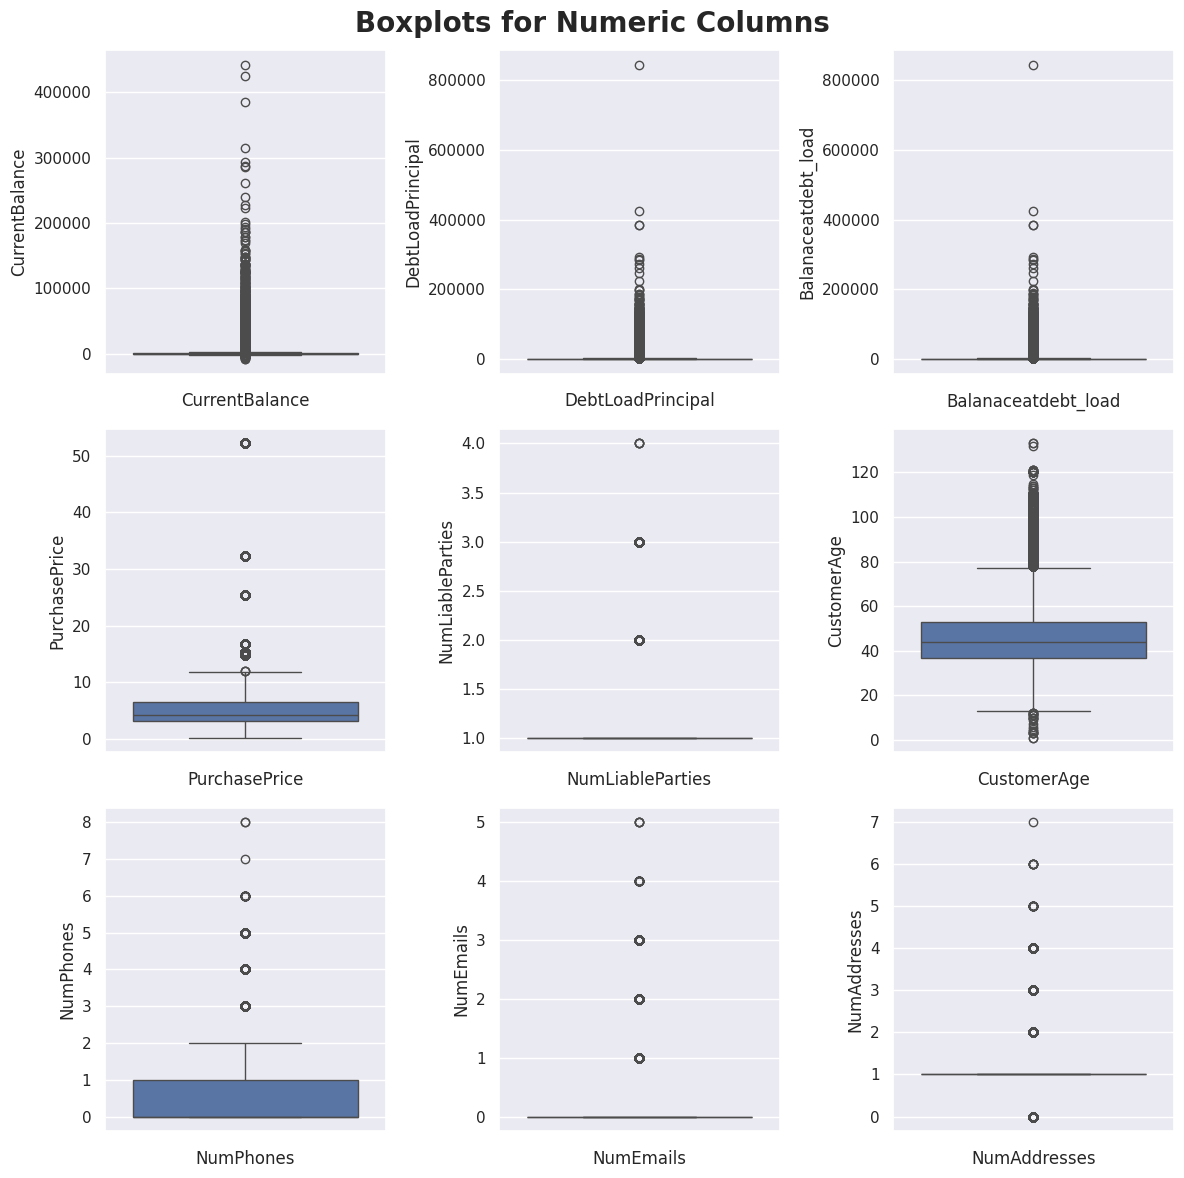

In [23]:
n_rows = 3
n_cols = 3
cols = df.select_dtypes(include=np.number).columns.tolist()
count = 0
col_num = 0

fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 12))
for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, count+1)
        sns.boxplot(df.loc[:, cols[col_num]], orient='vertical').set(xlabel=cols[col_num])
        if col_num < len(cols) :
            count += 1
            col_num += 1

plt.suptitle('Boxplots for Numeric Columns', fontsize=20, fontweight='bold')
fig.tight_layout()
plt.show()

In [24]:
# Creating interactive boxplots to see the exact outlier values
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

# Add boxplots for each column
fig.add_trace(go.Box(y=df.loc[:, cols[1]], name=cols[1]),row=1, col=1)
fig.add_trace(go.Box(y=df.loc[:, cols[2]], name=cols[2]),row=1, col=2)

# Update layout
fig.update_layout(title="Boxplots for Selected Columns", showlegend=True)

# Show plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CurrentBalance,390666.0,1349.716636,4103.534942,-7717.20,111.0000,491.630,1211.2675,441681.52
DebtLoadPrincipal,390666.0,1596.144247,4494.739639,0.00,277.0000,652.105,1452.3875,844343.00
Balanaceatdebt_load,390666.0,1660.329980,4612.207584,0.00,280.3625,665.680,1495.1525,844343.00
PurchasePrice,390666.0,5.672118,5.518944,0.19,3.0700,4.220,6.5900,52.18
NumLiableParties,390666.0,1.017823,0.135426,1.00,1.0000,1.000,1.0000,4.00
CustomerAge,390666.0,45.835048,12.415090,1.00,37.0000,44.000,53.0000,133.00
NumPhones,390666.0,0.432039,0.718490,0.00,0.0000,0.000,1.0000,8.00
NumEmails,390666.0,0.216395,0.440848,0.00,0.0000,0.000,0.0000,5.00
NumAddresses,390666.0,0.843283,0.466236,0.00,1.0000,1.000,1.0000,7.00


### Checking for the outlier rows

In [26]:
df[df['DebtLoadPrincipal'] == 844343.00]

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
194639,Creditor 32,8443.93,844343.0,844343.0,0.19,Other,ACTIVE,N,N,1.0,39.0,0,0,1,Y


In [27]:
df[df['CurrentBalance'] == -7717.20]

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
196750,Creditor 35,-7717.2,12214.73,13436.2,9.68,Credit Cards,PAID_IN_FULL,N,Y,1.0,47.0,2,0,0,N


### Removing outlier values from Column "CustomerAge"

In [28]:
# Using IQR method to remove outliers
q1 = df['CustomerAge'].quantile(0.25)
q3 = df['CustomerAge'].quantile(0.75)

iqr = q3 - q1
ll = q1 - (1.5 * iqr)
ul = q3 + (1.5 * iqr)

ul_outlier = df[df['CustomerAge'] > ul].shape[0]
ll_outlier = df[df['CustomerAge'] < ll].shape[0]

total_outlier = ul_outlier + ll_outlier
outlier_percentage = total_outlier * 100 / df.shape[0]

print(ul_outlier)
print(ll_outlier)
print(total_outlier)
print(outlier_percentage)

6533
24
6557
1.6784158334741186


In [29]:
# Set upper bounds for CustomerAge
df.loc[df['CustomerAge'] > ul, 'CustomerAge'] = ul

# Set lower bounds for CustomerAge
df.loc[df['CustomerAge'] < ll, 'CustomerAge'] = ll

[Text(0.5, 0, 'CustomerAge')]

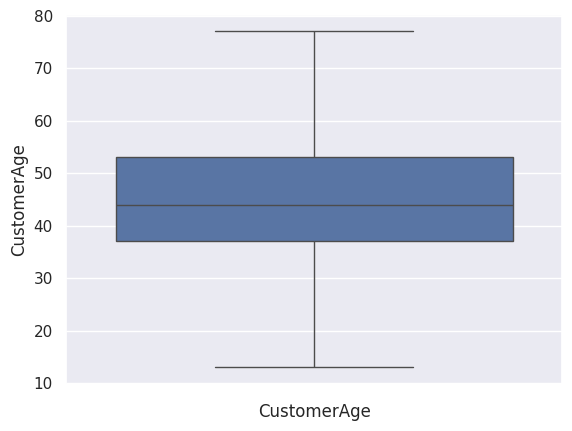

In [30]:
sns.boxplot(df['CustomerAge']).set(xlabel='CustomerAge')

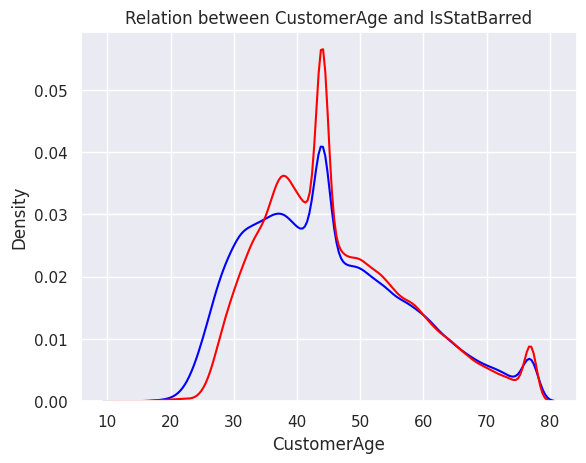

In [31]:
# Analyse CustomerAge vs IsStatBarred
sns.distplot(df[df['IsStatBarred']=='N']['CustomerAge'], hist=False, label='No', color='blue')
sns.distplot(df[df['IsStatBarred']=='Y']['CustomerAge'], hist=False, label='Yes', color='red')
plt.title("Relation between CustomerAge and IsStatBarred")
plt.show()

Text(0.5, 1.0, 'IsStatBarred vs InBankruptcy')

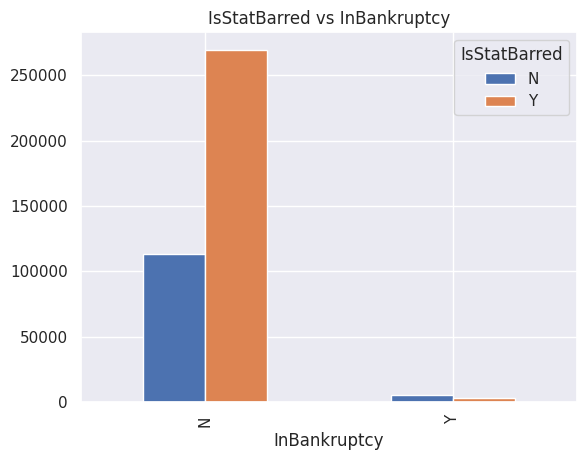

In [32]:
# Analyse IsStatBarred vs InBankruptcy
pd.crosstab(df['InBankruptcy'], df['IsStatBarred']).plot(kind='bar')
plt.title("IsStatBarred vs InBankruptcy")

Text(0.5, 1.0, 'IsStatBarred vs IsLegal')

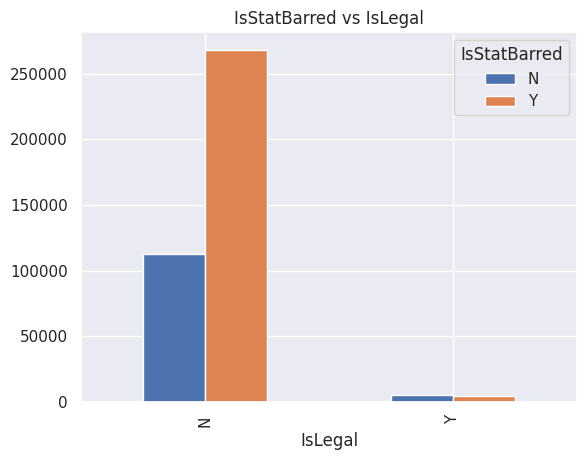

In [33]:
# Analyse IsStatBarred vs IsLegal
pd.crosstab(df['IsLegal'], df['IsStatBarred']).plot(kind='bar')
plt.title("IsStatBarred vs IsLegal")

## Encoding Categorical Data using LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['OriginalCreditor[Redacted]'] = le.fit_transform(df['OriginalCreditor[Redacted]'])
df['ProductOrDebtType'] = le.fit_transform(df['ProductOrDebtType'])
df['CollectionStatus'] = le.fit_transform(df['CollectionStatus'])
df['IsStatBarred'] = le.fit_transform(df['IsStatBarred'])
df['InBankruptcy'] = le.fit_transform(df['InBankruptcy'])
df['IsLegal'] = le.fit_transform(df['IsLegal'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390666 entries, 0 to 406422
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  390666 non-null  int64  
 1   CurrentBalance              390666 non-null  float64
 2   DebtLoadPrincipal           390666 non-null  float64
 3   Balanaceatdebt_load         390666 non-null  float64
 4   PurchasePrice               390666 non-null  float64
 5   ProductOrDebtType           390666 non-null  int64  
 6   CollectionStatus            390666 non-null  int64  
 7   InBankruptcy                390666 non-null  int64  
 8   IsLegal                     390666 non-null  int64  
 9   NumLiableParties            390666 non-null  float64
 10  CustomerAge                 390666 non-null  float64
 11  NumPhones                   390666 non-null  int64  
 12  NumEmails                   390666 non-null  int64  
 13  NumAddresses       

In [36]:
df.nunique(axis=0)

,0
OriginalCreditor[Redacted],52
CurrentBalance,177653
DebtLoadPrincipal,195921
Balanaceatdebt_load,198413
PurchasePrice,48
ProductOrDebtType,10
CollectionStatus,12
InBankruptcy,2
IsLegal,2
NumLiableParties,4


In [37]:
# Checking for the column wise unique values after performing Label Encoding
df_value_counts = {col:df[col].value_counts() for col in df.columns}
df_value_counts

{'OriginalCreditor[Redacted]': OriginalCreditor[Redacted]
 8     82557
 41    54843
 26    52014
 42    24854
 10    20454
 1     18912
 38    17242
 17    16418
 36    15933
 28    14474
 45    13238
 49    12266
 37     7441
 50     6545
 43     5682
 29     3785
 35     2763
 47     2367
 34     2281
 51     1966
 23     1459
 48     1327
 27     1325
 39     1263
 24     1168
 32      927
 46      874
 15      863
 25      858
 40      785
 9       770
 21      662
 31      633
 13      483
 20      273
 22      173
 16      159
 12      156
 30      106
 2        83
 3        82
 4        78
 19       59
 5        30
 33       13
 0         8
 11        6
 14        4
 6         1
 7         1
 44        1
 18        1
 Name: count, dtype: int64,
 'CurrentBalance': CurrentBalance
 0.00       66515
 50.00        172
 30.00        155
 65.63        132
 60.00        129
            ...  
 1538.63        1
 1639.86        1
 4655.35        1
 1309.14        1
 4652.65        1
 Name:

## Data Preparation: Splitting Features and Target

In [38]:
x = df.drop('IsStatBarred', axis=1)
y = df['IsStatBarred']

## Visualizing Feature Correlation with Heatmap

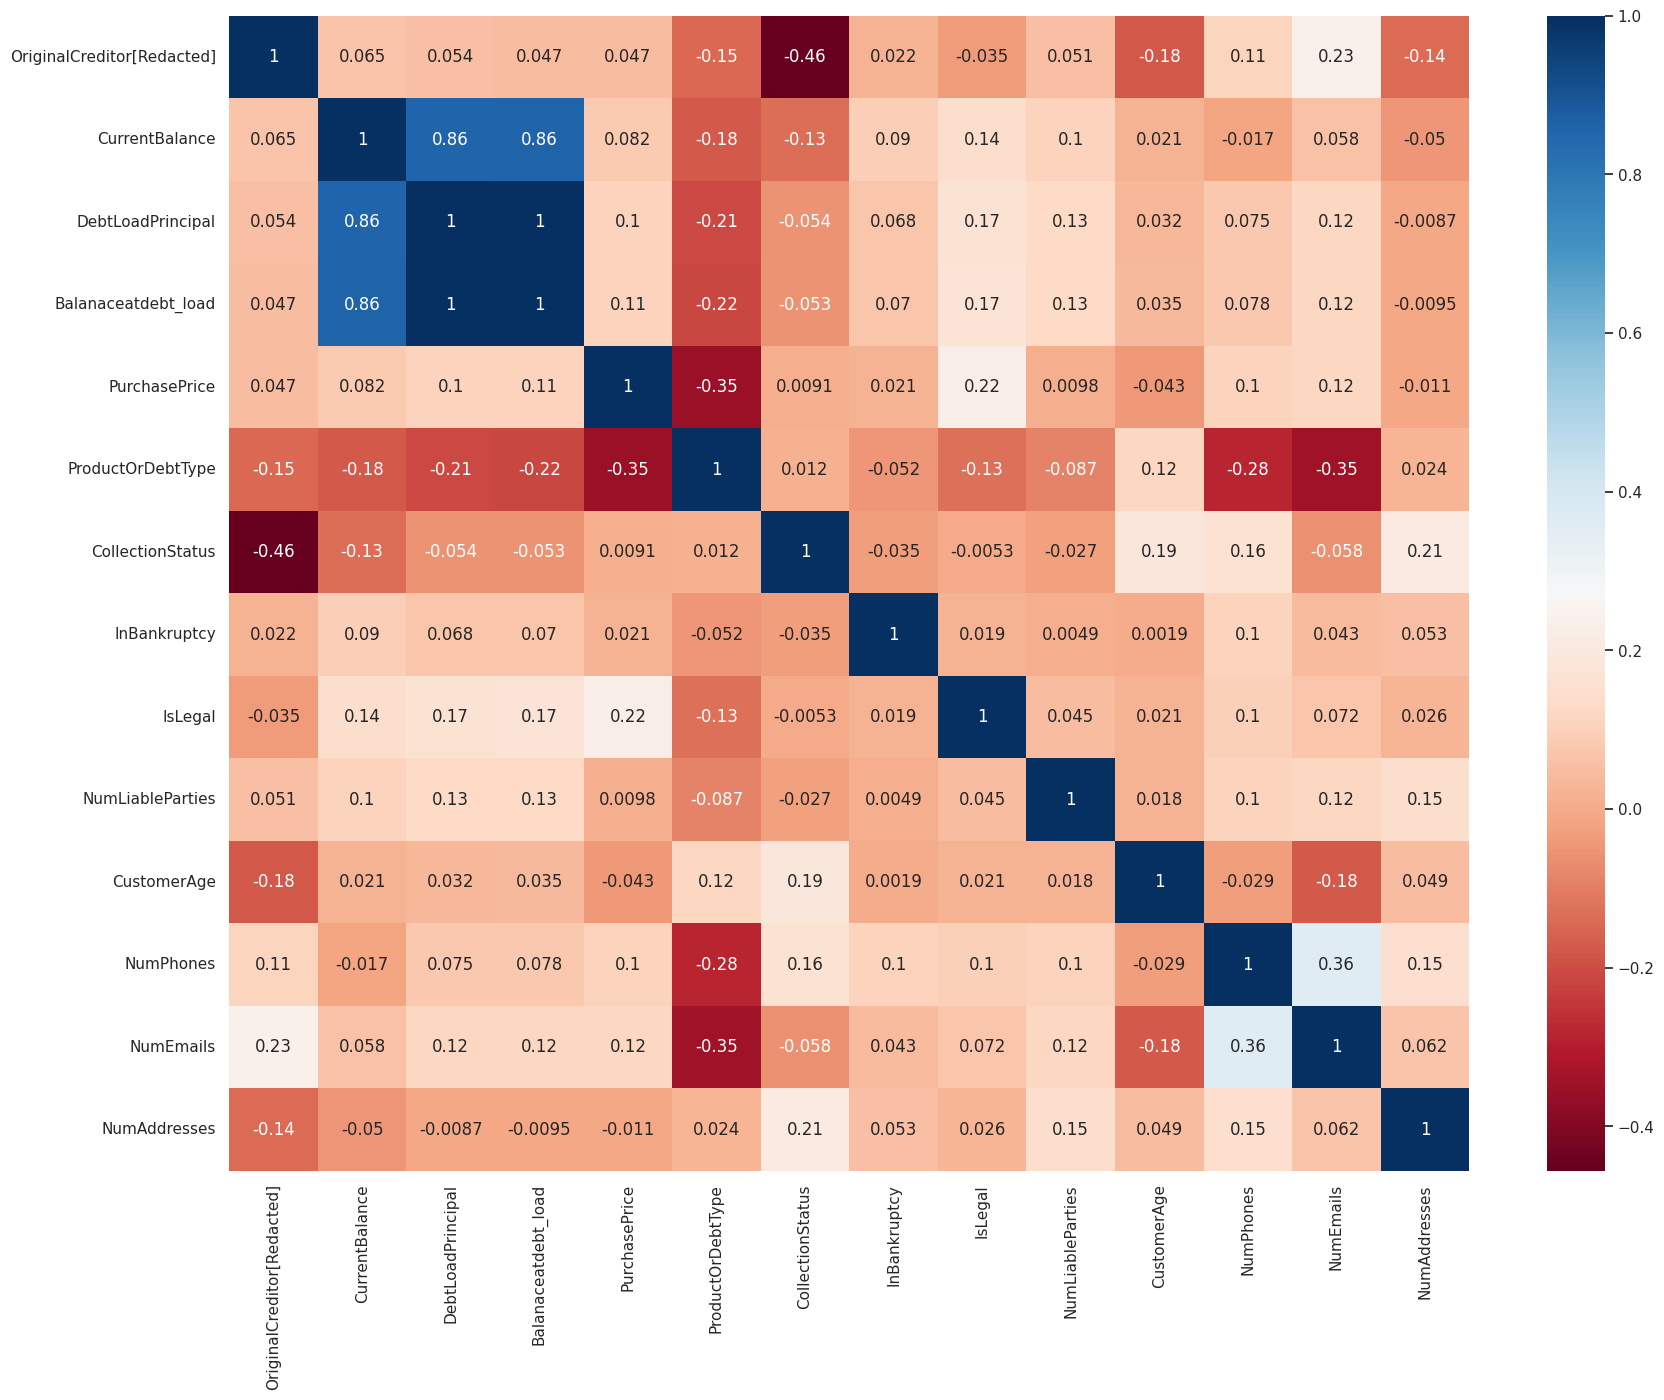

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(x.corr(),annot=True,cmap='RdBu')
plt.show()

## Removing Feature BalanceAtDebtLoad to avoid multicollinearity

In [40]:
x = x.drop(['Balanaceatdebt_load'], axis=1)

In [41]:
x

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,0,0.00,1160.20,4.22,5,7,0,1,1.0,53.0,0,0,1
1,11,182.90,182.90,4.22,5,1,0,0,1.0,44.0,0,0,1
2,0,0.00,538.57,4.22,5,7,0,0,1.0,44.0,1,0,1
3,11,8279.50,8279.50,4.22,5,8,0,0,1.0,44.0,1,0,1
4,0,0.00,523.00,4.22,5,7,0,1,1.0,46.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,45,448.20,448.20,7.38,2,0,0,0,1.0,36.0,1,1,1
406419,45,1678.37,1678.37,7.38,2,0,0,0,1.0,37.0,0,1,1
406420,45,3512.60,3512.60,7.38,2,0,0,0,1.0,71.0,1,1,1
406421,45,4477.31,4477.31,7.38,2,0,0,0,1.0,38.0,1,1,1


## Standardizing Feature Data

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().set_output(transform="pandas")
x_sc = sc.fit_transform(x)
x_sc

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,-1.751287,-0.328916,-0.096990,-0.263116,-0.524230,0.745107,-0.145958,6.262332,-0.13161,0.609831,-0.601316,-0.490861,0.336133
1,-1.027176,-0.284345,-0.314422,-0.263116,-0.524230,-0.815492,-0.145958,-0.159685,-0.13161,-0.141633,-0.601316,-0.490861,0.336133
2,-1.751287,-0.328916,-0.235292,-0.263116,-0.524230,0.745107,-0.145958,-0.159685,-0.13161,-0.141633,0.790493,-0.490861,0.336133
3,-1.027176,1.688737,1.486930,-0.263116,-0.524230,1.005207,-0.145958,-0.159685,-0.13161,-0.141633,0.790493,-0.490861,0.336133
4,-1.751287,-0.328916,-0.238756,-0.263116,-0.524230,0.745107,-0.145958,6.262332,-0.13161,0.025359,2.182303,-0.490861,0.336133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,1.210982,-0.219693,-0.255398,0.309459,-1.518194,-1.075592,-0.145958,-0.159685,-0.13161,-0.809600,0.790493,1.777499,0.336133
406419,1.210982,0.080090,0.018294,0.309459,-1.518194,-1.075592,-0.145958,-0.159685,-0.13161,-0.726104,-0.601316,1.777499,0.336133
406420,1.210982,0.527079,0.426378,0.309459,-1.518194,-1.075592,-0.145958,-0.159685,-0.13161,2.112758,0.790493,1.777499,0.336133
406421,1.210982,0.762171,0.641009,0.309459,-1.518194,-1.075592,-0.145958,-0.159685,-0.13161,-0.642608,0.790493,1.777499,0.336133


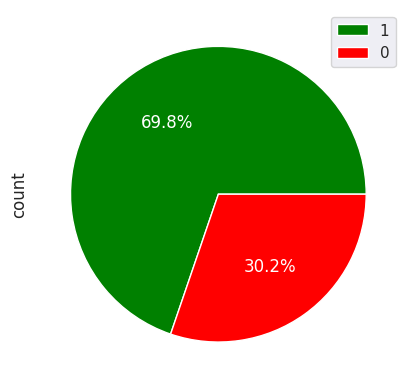

In [43]:
# Checking for class-imbalance in the target column
y.value_counts().plot(kind='pie', colors= ['green', 'red'], autopct='%1.1f%%', textprops={'color':"white"}, legend=True)
plt.show()

## Addressing Class Imbalance with SMOTE

In [44]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x_smote, y_smote = smote.fit_resample(x_sc, y)
x_smote = pd.DataFrame(x_smote, columns=x_sc.columns)
print(y.value_counts())
print()
print(y_smote.value_counts())

IsStatBarred
1    272543
0    118123
Name: count, dtype: int64

IsStatBarred
0    272543
1    272543
Name: count, dtype: int64


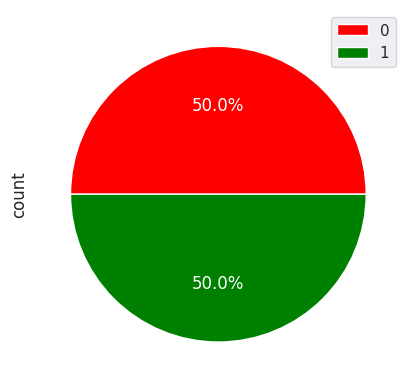

In [45]:
y_smote.value_counts().plot(kind='pie', colors= ['red', 'green'], autopct='%1.1f%%', textprops={'color':"white"}, legend=True)
plt.show()

In [46]:
x_smote.shape, y_smote.shape

((545086, 13), (545086,))

## Splitting the data into Train and Test set

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(408814, 13)
(136272, 13)
(408814,)
(136272,)


## Importing Machine Learning Libraries

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score,  recall_score,  roc_auc_score

## Model Evaluation and Comparison

In [50]:
# Training and Testing multiple machine learning models with the given dataset and comparing their accuracy
models = {"Logistic Regression": LogisticRegression(),
          "Gaussian Naive Bayes": GaussianNB(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name , model in models.items():
        model.fit(x_train,y_train)

        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [51]:
model_scores = fit_and_score(models=models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'Logistic Regression': 0.821078431372549,
 'Gaussian Naive Bayes': 0.7581087824351297,
 'KNN': 0.9547229071269226,
 'Decision Tree': 0.9647176235763767,
 'Random Forest': 0.974103264060115}

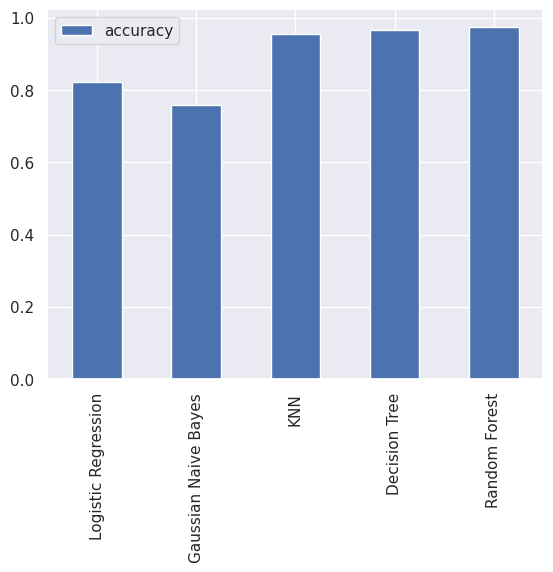

In [52]:
model_compare = pd.DataFrame(model_scores , index=['accuracy'])
model_compare.T.plot.bar();

## Final Model Selection

### Using Random Forest and creating the final model

Accuracy Score: 0.9367808500645767
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.91      0.94     68099
           1       0.92      0.96      0.94     68173

    accuracy                           0.94    136272
   macro avg       0.94      0.94      0.94    136272
weighted avg       0.94      0.94      0.94    136272

--------------------------------------------------------------------------------
Confusion Matrix:


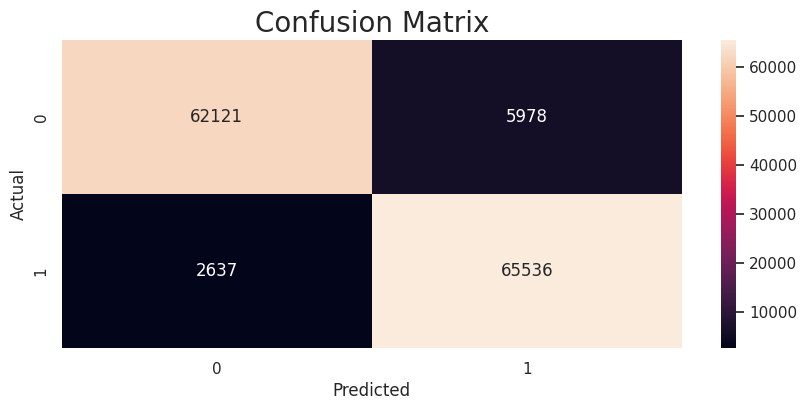

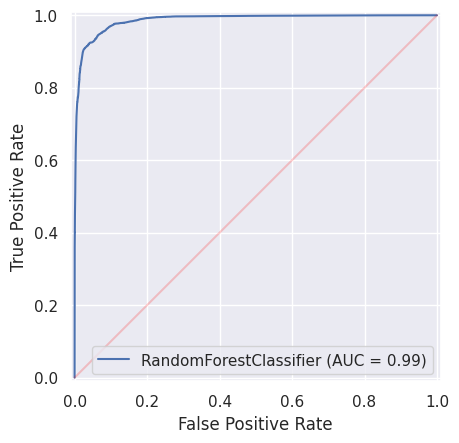

In [53]:
# Applying Hyper-parameter tuning to control overfitting
rfc = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    max_depth=6)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print('----'*20)

print(f"Classification Report\n {classification_report(y_test, y_pred)}")
print('----'*20)

print(f"Confusion Matrix:")
plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f');
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix', fontsize=20)
plt.show()

# Roc, AUC score
y_score1 = rfc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
 estimator_name="RandomForestClassifier")
display.plot()
plt.plot(np.linspace(0,1),np.linspace(0,1), color="red", alpha=0.2, label='Random Guess')
plt.show()